# Alfendio Alif Faudisyah

# Import Library

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Dataset 

## Load the dataset

In [3]:
df = pd.read_csv('LaptopPrice.csv')
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,7,23,65,8,4,58,8,1.37,7.200940
1,1,301,4,7,1,63,8,2,51,8,1.34,6.802328
2,7,50,3,14,8,74,8,16,53,4,1.86,6.356108
3,1,300,4,13,25,85,1,29,9,8,1.83,7.839309
4,1,300,4,7,23,67,8,16,59,8,1.37,7.498094
...,...,...,...,...,...,...,...,...,...,...,...,...
1296,10,580,0,10,13,89,5,4,47,5,1.80,6.459904
1297,10,588,0,7,19,89,1,29,47,5,1.30,7.313220
1298,10,196,3,10,0,34,3,35,40,5,1.50,5.438079
1299,7,2,3,14,0,89,7,10,21,5,2.19,6.639876


## Variable description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1301 non-null   int64  
 1   Product           1301 non-null   int64  
 2   TypeName          1301 non-null   int64  
 3   Inches            1301 non-null   int64  
 4   ScreenResolution  1301 non-null   int64  
 5   Cpu               1301 non-null   int64  
 6   Ram               1301 non-null   int64  
 7   Memory            1301 non-null   int64  
 8   Gpu               1301 non-null   int64  
 9   OpSys             1301 non-null   int64  
 10  Weight            1301 non-null   float64
 11  Price_euros       1301 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 122.1 KB


## Cek deskripsi statistik data

In [5]:
df.describe()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000
mean,6.441968,307.743274,2.578786,11.973098,9.215219,76.941583,5.727133,16.345888,54.600307,4.805534,2.037256,6.838180
std,4.087210,171.611301,1.242570,3.628314,7.887855,25.181916,2.628268,8.014427,21.537841,1.032473,0.664917,0.620726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690000,5.164786
25%,4.000000,182.000000,1.000000,10.000000,6.000000,65.000000,5.000000,10.000000,46.000000,5.000000,1.500000,6.396930
50%,7.000000,291.000000,3.000000,14.000000,8.000000,78.000000,7.000000,16.000000,53.000000,5.000000,2.040000,6.885510
75%,10.000000,455.000000,3.000000,14.000000,15.000000,97.000000,8.000000,23.000000,72.000000,5.000000,2.300000,7.302496
max,18.000000,616.000000,5.000000,17.000000,39.000000,116.000000,8.000000,38.000000,108.000000,8.000000,4.700000,8.716044


## Visualisasi data dengan boxplot untuk mendeteksi outliers pada beberapa fitur numerik

<AxesSubplot:xlabel='Inches'>

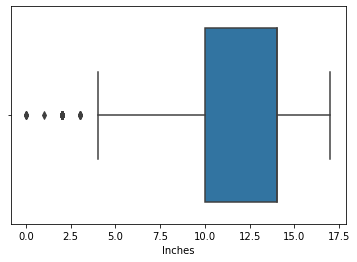

In [6]:
sns.boxplot(x=df['Inches'])

<AxesSubplot:xlabel='Ram'>

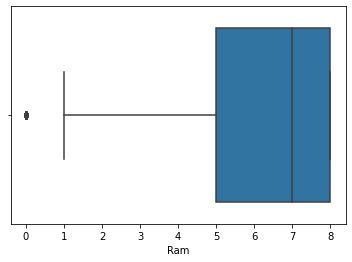

In [7]:
sns.boxplot(x=df['Ram'])

<AxesSubplot:xlabel='Weight'>

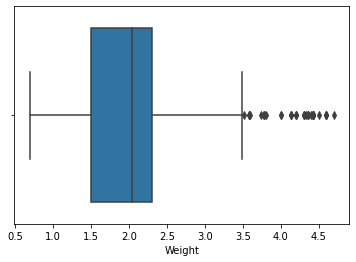

In [8]:
sns.boxplot(x=df['Weight'])

## Buat batas bawah dan batas atas
Kurangi Q1 dengan 1,5 * IQR. Kemudian, untuk membuat batas atas, tambahkan 1.5 * IQR dengan Q3.
- Batas bawah = Q1 - 1.5 * IQR
- Batas atas = Q3 + 1.5 * IQR

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

## Cek ukuran dataset setelah drop outliers

In [10]:
df.shape

(887, 12)

## Numerical features
Dengan fitur numerik dapat dilihat histogram masing-masing fiturnya.

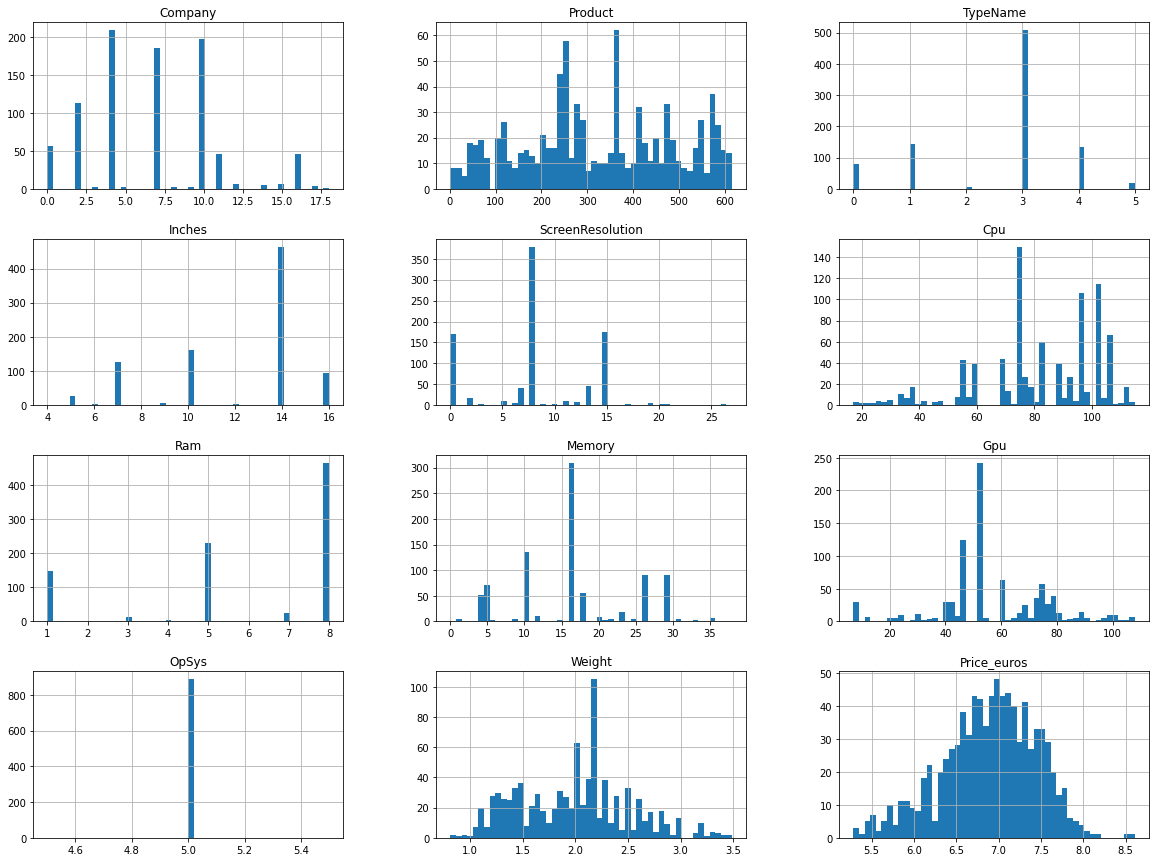

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Fungsi pairplot() untuk mengamati hubungan antar fitur numerik 

c:\Users\alfen\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


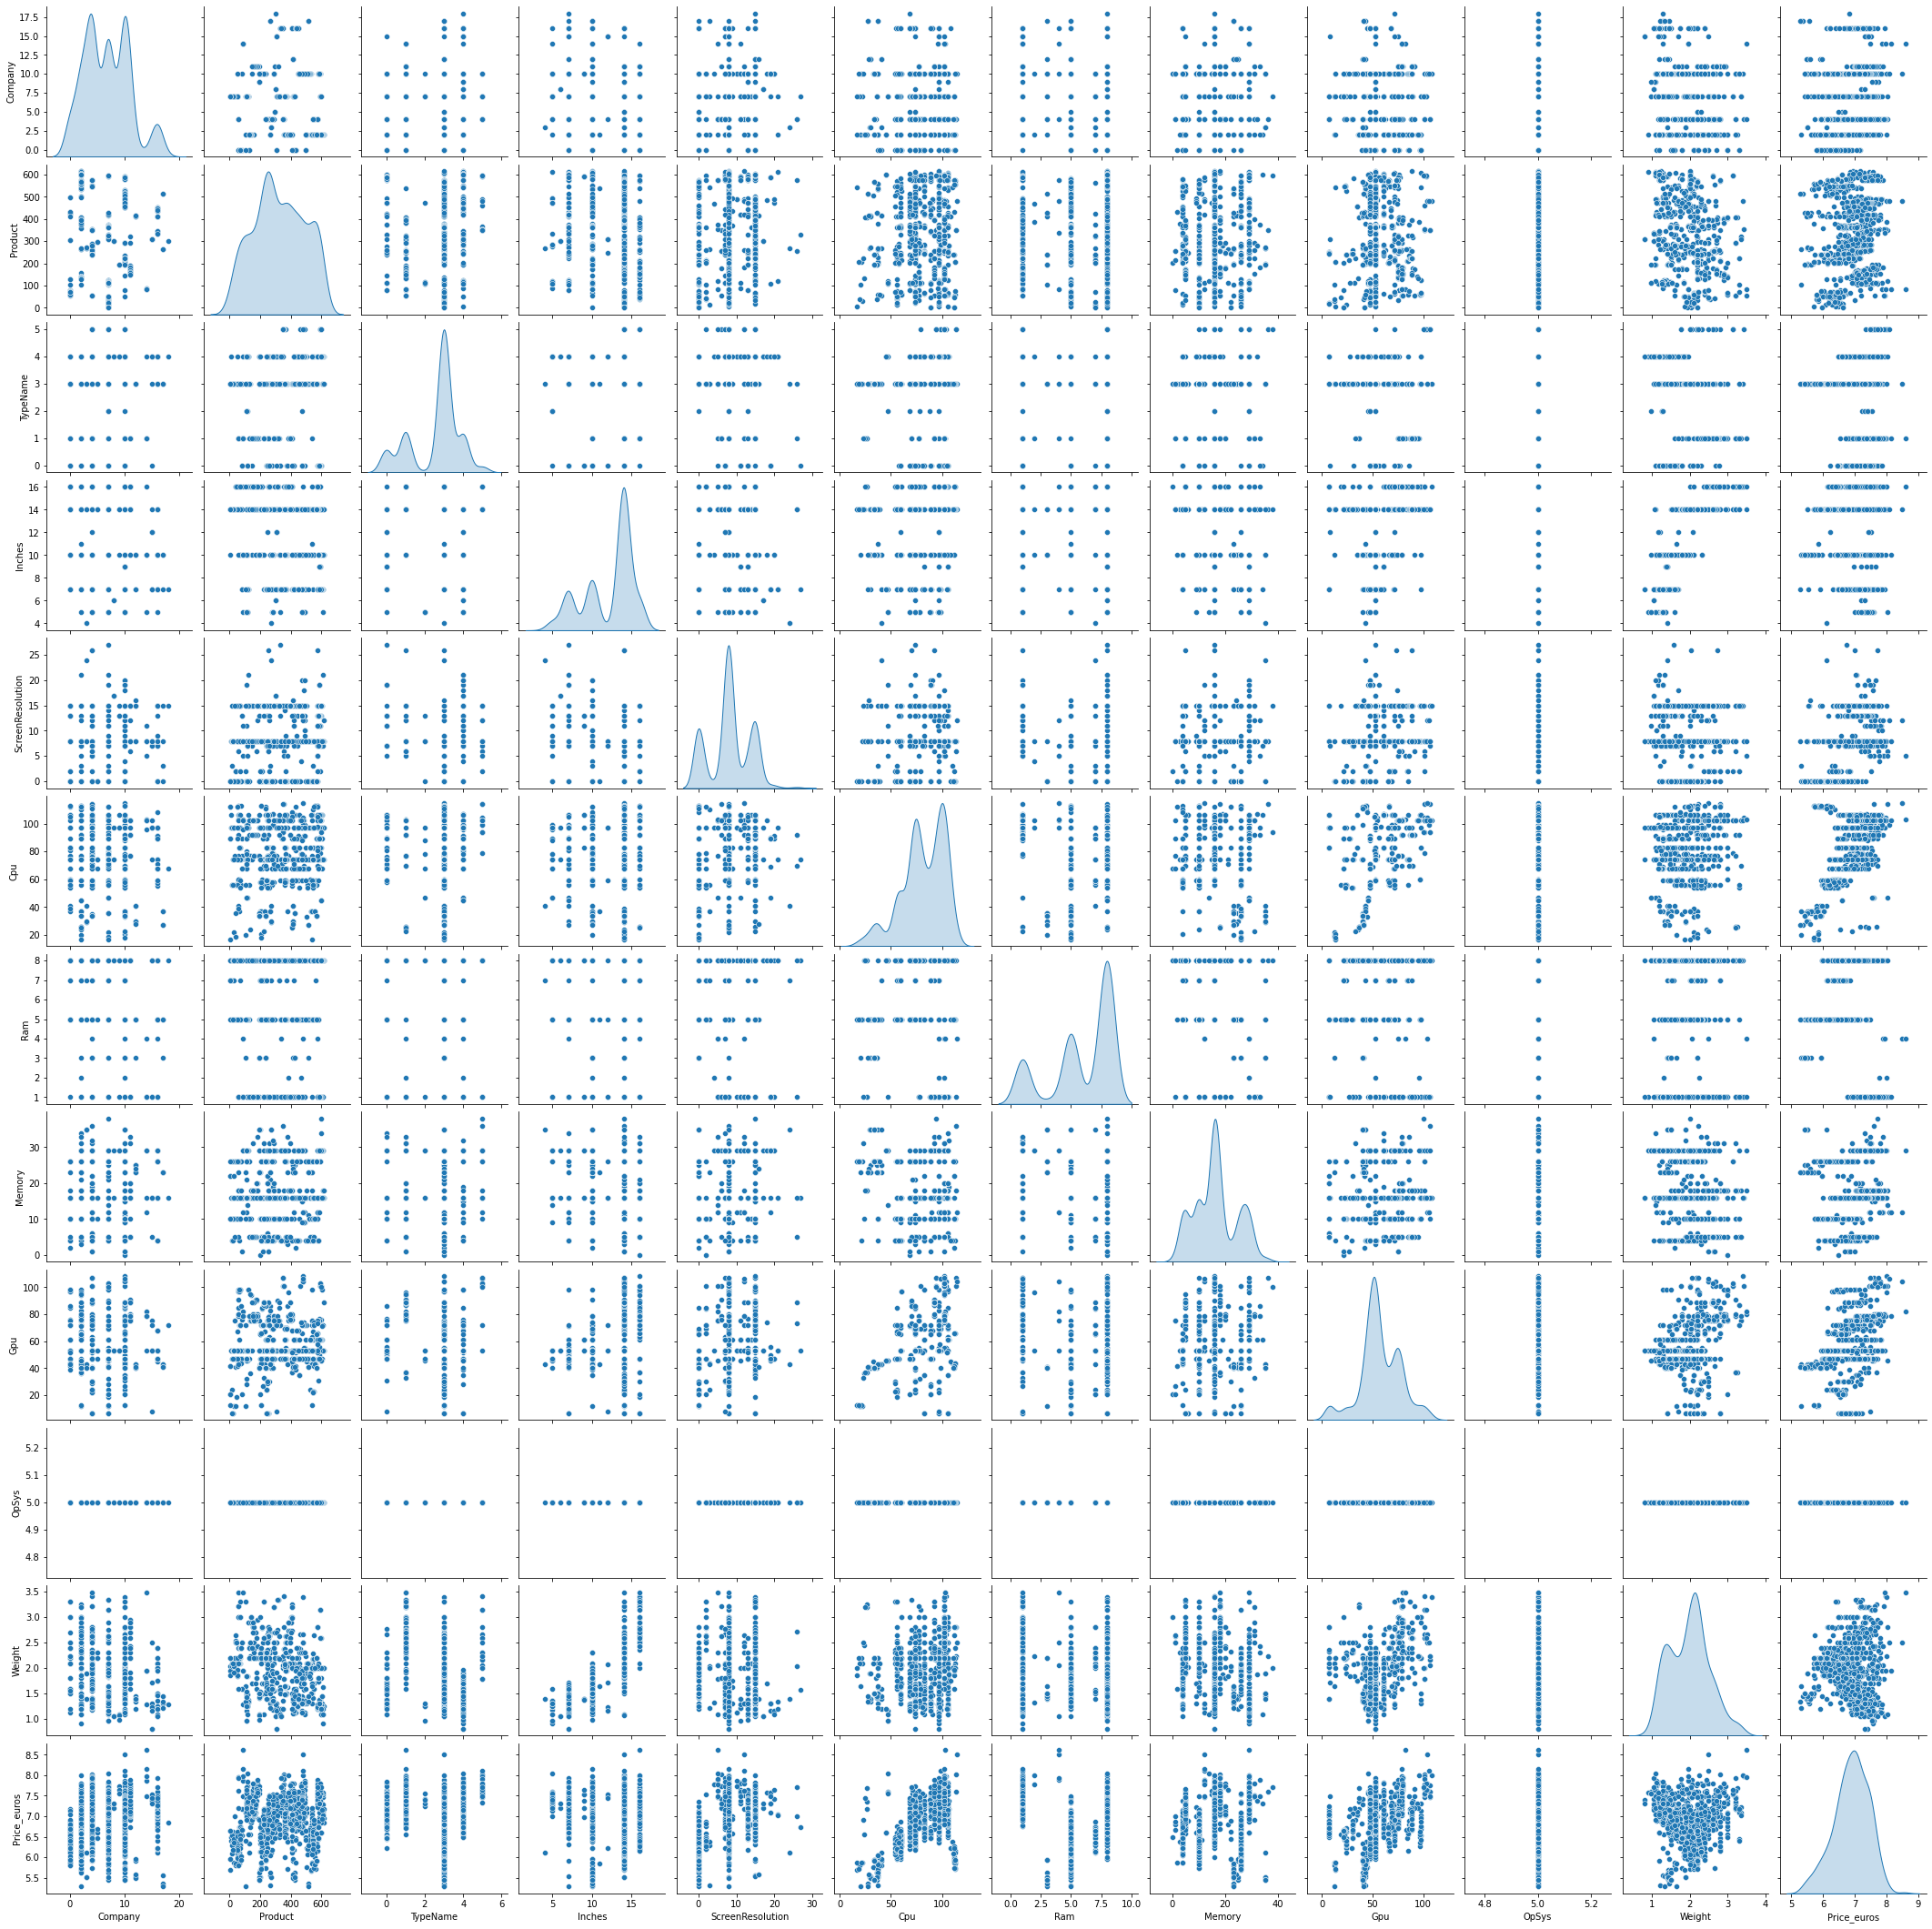

In [12]:
sns.pairplot(df, diag_kind = 'kde')

Fungsi corr() untuk mengevaluasi skor korelasi

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

<Figure size 720x576 with 0 Axes>

## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

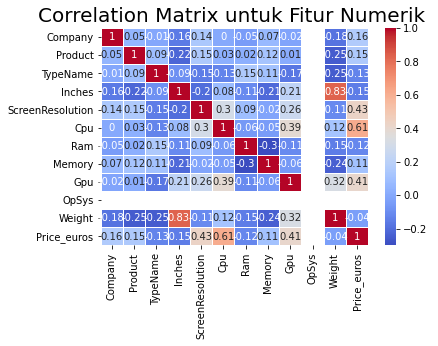

In [14]:
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Fitur 'Weight' memiliki korelasi yang sangat kecil dengan fitur 'Price_ueros' yaitu 0.04

## Drop fitur Weight

In [15]:
df.drop(['Weight'], inplace=True, axis=1)
df.head()

c:\Users\alfen\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
8,2,607,4,10,8,106,1,29,98,5,7.310550
9,0,430,4,10,15,83,8,16,61,5,6.647688
13,4,239,3,14,8,56,5,16,24,5,6.214408
16,4,239,3,14,8,97,8,16,24,5,6.614726
19,4,576,4,7,13,83,8,4,61,5,6.887553


# Split Dataset

Memisahkan data untuk training dan testing

In [16]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

Memisahkan features dari labels

In [17]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Price_euros')
test_labels = test_features.pop('Price_euros')

# Normalisasi

Melihat perbedaan rentang tiap fitur

In [18]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Company,6.709859,4.105147
Product,323.409859,166.670379
TypeName,2.577465,1.254183
Inches,12.136620,3.115489
ScreenResolution,8.128169,5.327277
Cpu,80.963380,20.940949
Ram,5.901408,2.591920
Memory,16.402817,7.863324
Gpu,57.392958,19.547106
OpSys,5.000000,0.000000


## Lapisan normalisasi

Membuat lapisan

In [19]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Menyesuaikan status lapisan prapemrosesan ke data 

In [20]:
normalizer.adapt(np.array(train_features))

# Model

## Regresi menggunakan Deep Neural Network (DNN)

In [21]:
model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.compile(loss = 'mean_absolute_error', metrics = ['mse'],
              optimizer=tf.keras.optimizers.Adam(0.001))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,950
Trainable params: 4,929
Non-trainable params: 21
_____________________________________________________

# Training

In [28]:
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    epochs=200)

Epoch 1/200
18/18 [==============================] - 0s 18ms/step - loss: 0.3648 - mse: 0.2145 - val_loss: 0.2218 - val_mse: 0.0851
Epoch 2/200
18/18 [==============================] - 0s 17ms/step - loss: 0.3483 - mse: 0.1900 - val_loss: 0.2171 - val_mse: 0.0813
Epoch 3/200
18/18 [==============================] - 0s 14ms/step - loss: 0.3188 - mse: 0.1594 - val_loss: 0.1904 - val_mse: 0.0702
Epoch 4/200
18/18 [==============================] - 0s 20ms/step - loss: 0.3447 - mse: 0.1873 - val_loss: 0.1997 - val_mse: 0.0761
Epoch 5/200
18/18 [==============================] - 0s 16ms/step - loss: 0.3402 - mse: 0.1803 - val_loss: 0.1835 - val_mse: 0.0667
Epoch 6/200
18/18 [==============================] - 0s 15ms/step - loss: 0.3322 - mse: 0.1815 - val_loss: 0.1928 - val_mse: 0.0698
Epoch 7/200
18/18 [==============================] - 0s 18ms/step - loss: 0.3174 - mse: 0.1604 - val_loss: 0.2133 - val_mse: 0.0825
Epoch 8/200
18/18 [==============================] - 0s 16ms/step - loss: 0.

# Visualisasi

## Visualisasi MAE

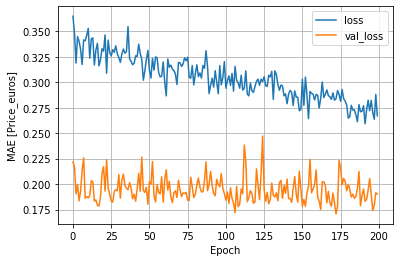

In [29]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MAE [Price_euros]')
plt.legend()
plt.grid(True)

## Visualisasi MSE

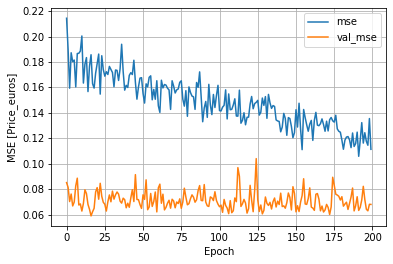

In [30]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.xlabel('Epoch')
plt.ylabel('MSE [Price_euros]')
plt.legend()
plt.grid(True)

# Testing dan Evaluasi

In [31]:
model.evaluate(test_features, test_labels)

6/6 [==============================] - 0s 9ms/step - loss: 0.2053 - mse: 0.0703


[0.20526553690433502, 0.07034951448440552]